In [8]:
import matplotlib.pyplot as plt
import numpy as np
import struct
import os

%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 10]
os.mkdir('current')

In [9]:
def dat2nparr(dat_file_dir):
    buffer = []
    dat_file = open(dat_file_dir, "rb").read()

    for i in range(0, len(dat_file), 2):
        buffer.append(struct.unpack("<H", dat_file[i: i + 2]))

    matrix = np.reshape(np.array(buffer), (2048, 1200))

    return matrix


def split(array, nrows, ncols):
    """Split a matrix into sub-matrices."""

    r, h = array.shape
    return (array.reshape(h//nrows, nrows, -1, ncols)
                 .swapaxes(1, 2)
                 .reshape(-1, nrows, ncols))

In [10]:
buffer_matrix = dat2nparr('dat/SO_210823_152541.dat')
print(buffer_matrix.shape)

splited_buffer = split(buffer_matrix, 256, 240)
splited_buffer.shape

(2048, 1200)


(40, 256, 240)

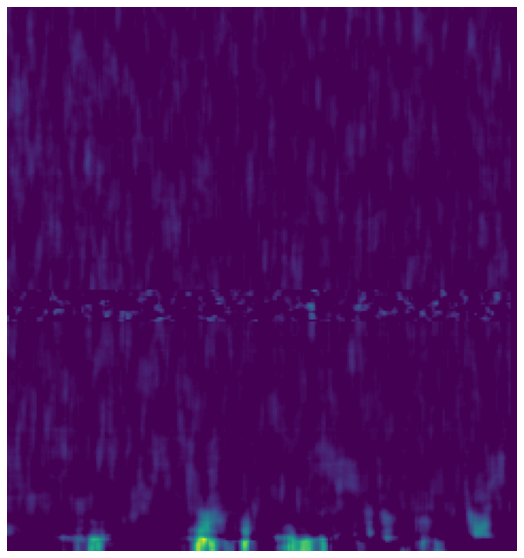

In [11]:
for i in range(len(splited_buffer)):
    plt.imshow(splited_buffer[i])
    plt.axis("off")
    plt.tick_params(axis='both', left='off', top='off', right='off', bottom='off', labelleft='off', labeltop='off', labelright='off', labelbottom='off')
    plt.savefig(f'current/{i}.png', dpi=100, bbox_inches='tight', pad_inches=0.0)
#     plt.show()